In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data_house_prices_2.xlsx',sheet_name='data')
df

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
0,380000,8450,2003,2003,196,8,2996.0,20081
1,181500,9600,1976,1976,0,6,7606.0,15171
2,223500,11250,2001,2002,162,6,5856.0,17368
3,140000,9550,1915,1970,0,7,4789.0,21808
4,250000,14260,2000,2000,350,9,1248.0,16240
...,...,...,...,...,...,...,...,...
96,214000,10264,1999,1999,183,6,4182.0,12897
97,94750,10921,1965,1965,48,6,NaN,25023
98,83000,10625,1920,1950,0,5,203.0,23344
99,128950,9320,1959,1959,NaN,6,863.0,23415


**Общий обзор данных**

Посмотрим в каких полях есть пропуски? Пропуски есть только в двух полях

In [27]:
df.isna().any()

Price              False
Area               False
YearBuilt          False
YearRestoration    False
MasVnrArea          True
RoomsNumb          False
SchoollDistance     True
CenterDistance     False
dtype: bool

Почему поле **MasVnrArea** имеет тип **object**, хотя на первый взгляд содержит только числовые данные? Посмотрим на него повнимательнее?

In [54]:
df.dtypes

Price                int64
Area                 int64
YearBuilt            int64
YearRestoration      int64
MasVnrArea          object
RoomsNumb            int64
SchoollDistance    float64
CenterDistance       int64
dtype: object

В поле **MasVnrArea** содержатся строковые значения, который фактически означают отсутсвие приусадебно площадиди. Фактически их можно заменить на NaN или 0 

In [10]:
df['MasVnrArea'].unique()

array([196, 0, 162, 350, 186, 240, 'no', 286, 306, 212, 180, 380, 281,
       640, 200, "doesn't have", 246, 132, 650, 101, 412, 272, 456, 1031,
       178, 573, 344, 287, 167, 1115, 40, 104, 576, 443, 468, 66, 22, 284,
       76, 203, 68, 183, 48, nan], dtype=object)

In [8]:
# находим строковые значения в датафрейме
str_values = [i for i in df['MasVnrArea'].unique() if isinstance(i, str)]

ind_to_inplace = df[df['MasVnrArea'].isin(str_values)].index
df.loc[ind_to_inplace,'MasVnrArea'] = 0
# также заполним сразу единственный пропуск
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

Перепроверим, все ли заполнилось корретно и поменяем тип данных столбца

In [22]:
df['MasVnrArea'].unique()

array([ 196,    0,  162,  350,  186,  240,  286,  306,  212,  180,  380,
        281,  640,  200,  246,  132,  650,  101,  412,  272,  456, 1031,
        178,  573,  344,  287,  167, 1115,   40,  104,  576,  443,  468,
         66,   22,  284,   76,  203,   68,  183,   48])

In [143]:
df['MasVnrArea'] = df['MasVnrArea'].astype('int')

In [9]:
df.dtypes

Price                int64
Area                 int64
YearBuilt            int64
YearRestoration      int64
MasVnrArea           int64
RoomsNumb            int64
SchoollDistance    float64
CenterDistance       int64
dtype: object

In [31]:
df.describe()

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
count,101.000000,101.000000,1.010000e+02,101.000000,101.000000,101.000000,98.000000,101.000000
mean,187516.495050,9718.683168,1.963856e+05,1924.900990,120.435644,6.207921,3169.540816,19717.811881
std,90728.847921,3439.495530,1.952247e+06,339.101887,212.827978,1.544777,2643.279965,5509.189755
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129900.000000,7599.000000,1.954000e+03,1962.000000,0.000000,5.000000,475.750000,17709.000000
50%,159000.000000,9591.000000,1.972000e+03,1992.000000,0.000000,6.000000,2899.500000,20634.000000
75%,226000.000000,11241.000000,2.002000e+03,2003.000000,186.000000,7.000000,5617.250000,23343.000000
max,480000.000000,20271.000000,1.962196e+07,2009.000000,1115.000000,11.000000,7895.000000,29417.000000


**Визуальный анализ**

In [32]:
sns.pairplot(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000022E32CA4940> (for post_execute):


KeyboardInterrupt: 

In [42]:
df.columns

Index(['Price', 'Area', 'YearBuilt', 'YearRestoration', 'MasVnrArea',
       'RoomsNumb', 'SchoollDistance', 'CenterDistance'],
      dtype='object')

На гистограммах некоторых параметров можно увидеть странное поведение данных, например, на **YearBuilt** и **YearRestoration**, но пока сложно сделать какие-то выводы насчет этого. Также в некоторых полях есть значения, похожие аномальные, например **RoomsNumber** и **CenterDistance** со значениями около нуля. Нужно еще внимательно посмотреть на данные под другим углом.  

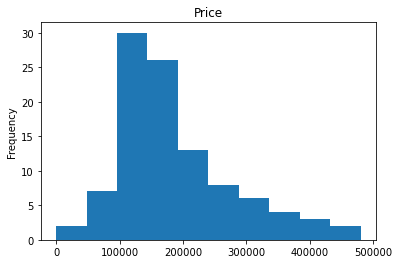

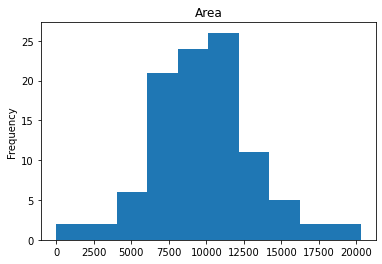

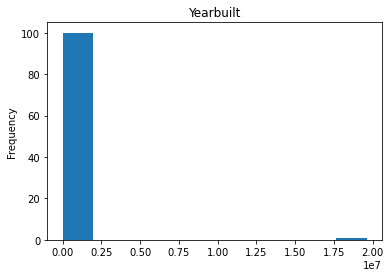

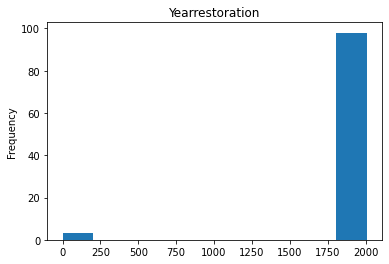

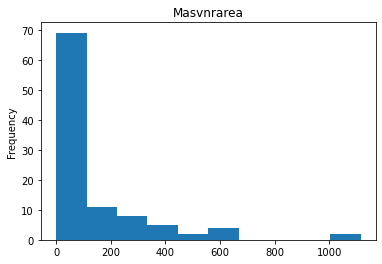

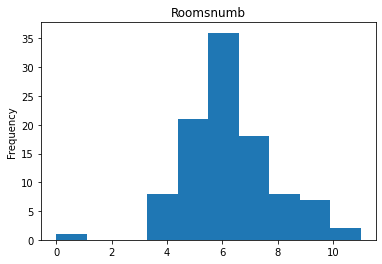

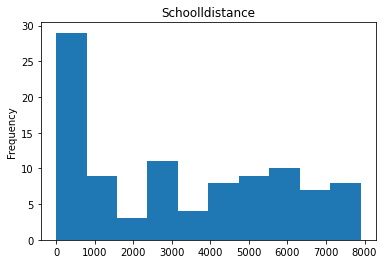

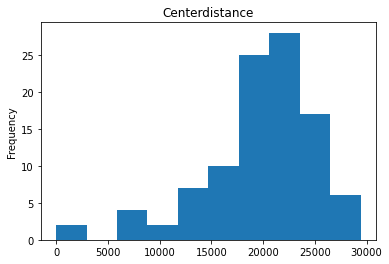

In [33]:
for col in df.columns:
    df[col].plot(kind='hist', title=col.capitalize())
    plt.show()

In [34]:
df.columns

Index(['Price', 'Area', 'YearBuilt', 'YearRestoration', 'MasVnrArea',
       'RoomsNumb', 'SchoollDistance', 'CenterDistance'],
      dtype='object')

Посмотрим на диграммы рассеяния, котрые покажут связь целевой переменной **Price** со всеми параметрами 

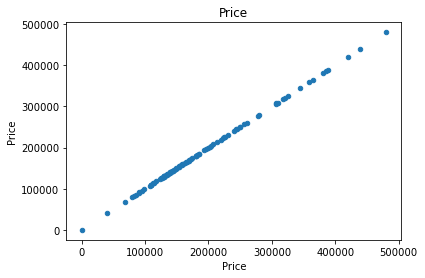

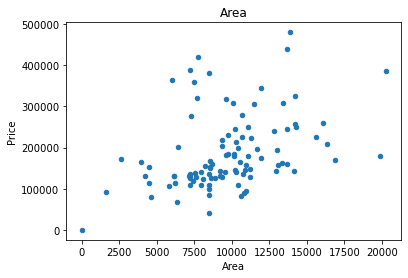

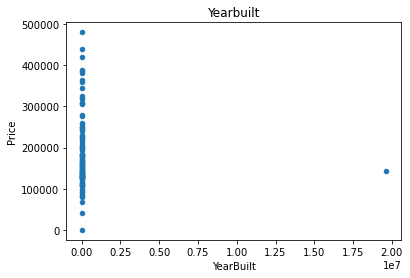

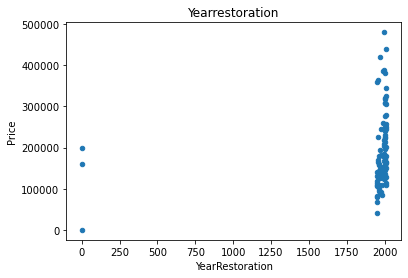

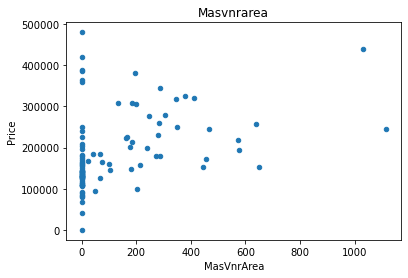

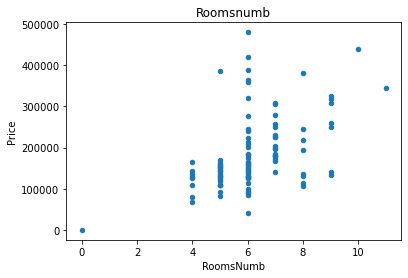

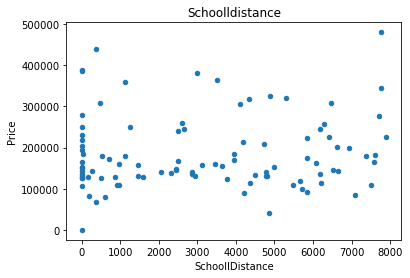

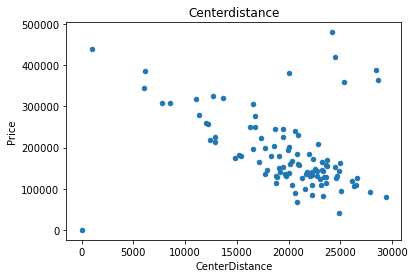

In [37]:
for col in df.columns:
    df.plot(x=col, y='Price', kind='scatter', title=col.capitalize())
    plt.show()

Действительно, в некоторых полях есть значения, равные нулю. Также присутсвуют выбросы. Особенно странное рассеяние точек у **YearBuilt** и **YearRestoration**. Посмотрим внимательнее на эти "странные" значения. 

In [47]:
df[df['CenterDistance']==0]

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
100,0,0,0,0,0,0,0.0,0


In [147]:
# Фиктивные пропуски, которые надо обрабатывать
df[df['SchoollDistance']==0]
# df[df['SchoollDistance'].isna()]

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
5,143000,14115,1993,1995,0,5,0.0,22715
13,279500,10652,2006,2007,306,7,0.0,11300
22,230000,9742,2002,2002,281,7,0.0,20891
26,134800,7200,1951,2000,0,5,0.0,19653
31,149350,8544,1966,2006,0,6,0.0,19102
37,153000,8532,1954,1990,650,5,0.0,19450
43,130250,9200,1975,1980,0,5,0.0,24671
47,249700,11096,2006,2006,0,7,0.0,16757
53,385000,20271,1981,1987,0,5,0.0,6158
59,124900,7200,1972,1972,0,4,0.0,21299


In [50]:
# Также, фиктивные пропуски в первых двух случаях
df[df['YearRestoration']==0]

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
7,200000,10382,1973,0,240,7,6929.0,17709
18,159000,13695,2004,0,0,6,3456.0,20116
100,0,0,0,0,0,0,0.0,0


In [148]:
# Выбросы в данных, которые, фактически являются ошибкой написания года, их можжно исправить
df[df['YearBuilt']>2005]

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
12,144000,12968,19621962,1962,0,4,6660.0,23343
13,279500,10652,2006,2007,306,7,0.0,11300
23,129900,4224,19760,1976,0,6,2931.0,19736
25,256300,14230,2007,2007,640,7,6281.0,12203
27,306000,11478,2007,2008,200,7,4114.0,16561
32,179900,11049,2007,2007,0,7,520.0,19058
47,249700,11096,2006,2006,0,7,0.0,16757
58,438780,13682,2006,2006,1031,10,362.0,1039
62,202500,6442,2006,2006,178,6,6630.0,20017
82,245000,10206,2007,2007,468,6,2647.0,19467


Почистим данные от явных косяков и еще раз посмотрим на них

In [3]:
# Удаляем стоку со всеми нулями вместо значений
df.drop(100, axis='index', inplace=True)  #axis=0

# Исправляем ошибку в YearBuilt
df.loc[12,'YearBuilt'] = 1962
df.loc[23,'YearBuilt'] = 1976


Чем заполнить пропусти в данных? Существуем много стратегий заполнения пропуской, они могут зависить от решаемой задачи и особенностей данных

**Стратегии заполнения пропусков в данных:**
* 0
* Среднее или медианное значение 
* Наиболее частое значение в выборке (мода)
* Наиболее частое значение в группе
* Интерполяция или моделирование пропущенных значений
* Другой вариант, который соотвествует логике данных 

In [15]:
# Заполним фиктивные и настроящие пропуски средним значением
ind = df[df['SchoollDistance']==0].index
df.loc[ind,'SchoollDistance'] = df['SchoollDistance'].mean()
df['SchoollDistance'].fillna(df['SchoollDistance'].mean(), inplace=True)

In [16]:
# Проверяем, что пропусков нет
df[df['SchoollDistance'].isna()]

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance


In [96]:
# Мы не можем заполнить фиктивные пропуски в год YearRestoration средним или наиболее частым значением, 
# иначе, данные могуть стать противоречивыми. Поэтому посмотрим, какая наиболее частая разнича между годом реконструкции 
# и годом строительства, и на ее основе заполним пропуски
diff = df['YearRestoration'] - df['YearBuilt']
diff.value_counts()

 0       50
 1       14
 49       2
 5        2
 19       2
 40       2
 88       2
 30       2
 20       1
-2004     1
 2        1
-5        1
 76       1
 6        1
 7        1
-11       1
 11       1
 16       1
 72       1
 55       1
 54       1
 24       1
 29       1
 85       1
 33       1
 35       1
 36       1
 71       1
 67       1
-1973     1
 53       1
 23       1
dtype: int64

In [5]:
# Заполним год реставрации годом постройки, как самый частый вариант
df.loc[7, 'YearRestoration'] = df.loc[7, 'YearBuilt']
df.loc[18, 'YearRestoration'] = df.loc[18, 'YearBuilt']

Посмотрим теперь еще раз на описательные статистики, а также визуализации для более чистых данных

In [153]:
df.describe()

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,97.000000,100.00000
mean,189391.660000,9815.870000,1971.570000,1983.920000,121.640000,6.270000,3763.429695,19914.99000
std,89197.223552,3314.516006,29.348569,20.967353,213.553982,1.420307,2195.426523,5166.36084
min,40000.000000,1596.000000,1910.000000,1950.000000,0.000000,4.000000,44.000000,1039.00000
25%,129900.000000,7643.250000,1954.750000,1964.750000,0.000000,5.000000,2437.000000,17725.50000
50%,159500.000000,9595.500000,1971.000000,1994.000000,0.000000,6.000000,3202.216495,20706.00000
75%,227000.000000,11243.250000,2000.250000,2003.250000,188.500000,7.000000,5665.000000,23343.25000
max,480000.000000,20271.000000,2009.000000,2009.000000,1115.000000,11.000000,7895.000000,29417.00000


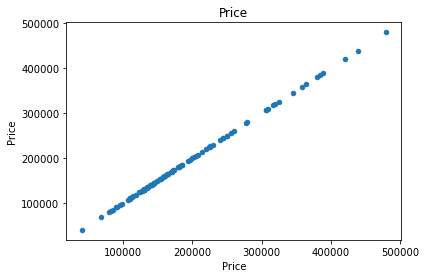

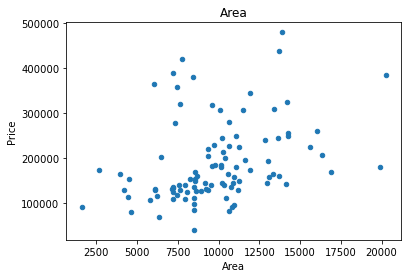

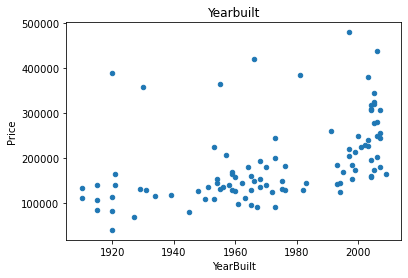

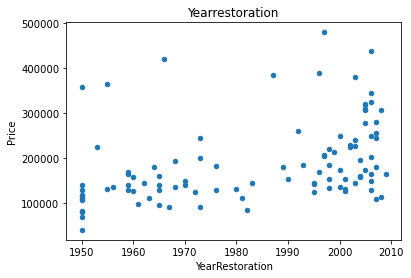

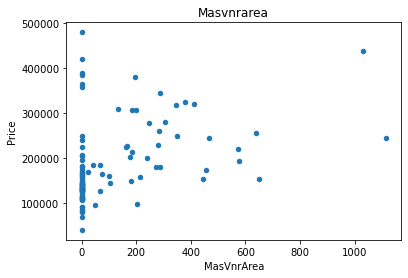

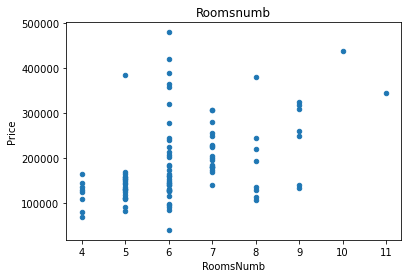

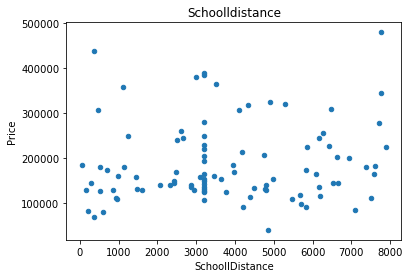

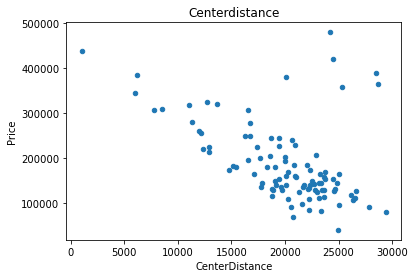

In [109]:
for col in df.columns:
    df.plot(x=col, y='Price', kind='scatter', title=col.capitalize())
    plt.show()

Теперь посмотрим на связь некоторых параметров между собой через диаграммы рассеяния

По данной диаграмме видны интересные особенности: 
* год строительства не может превышать год реставрации
* во многих случаях годы строительства и реставрации совпадают
* дома, построенные до 50-х годов были реконструированы в 50-х
* есть два случая, когда год строительства > года реконструкции, это аномалии, их надо отдельно посмотреть

<AxesSubplot:xlabel='YearBuilt', ylabel='YearRestoration'>

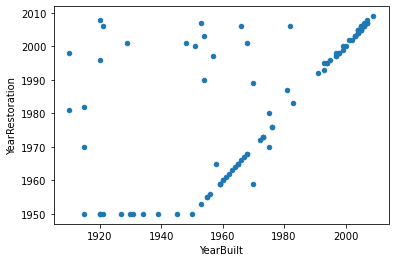

In [110]:
df.plot(x='YearBuilt',y='YearRestoration',kind='scatter')

In [112]:
# аномальные значение - возможно, просто перепутаны значения YearBuilt и YearRestoration
df[df['YearBuilt'] > df['YearRestoration']]

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
16,149000,11241,1975,1970,180,5,2434.0,22537
44,141000,7945,1970,1959,0,6,2070.0,19173


In [46]:
df.columns

Index(['Price', 'Area', 'YearBuilt', 'YearRestoration', 'MasVnrArea',
       'RoomsNumb', 'SchoollDistance', 'CenterDistance'],
      dtype='object')

<AxesSubplot:xlabel='YearBuilt', ylabel='YearRestoration'>

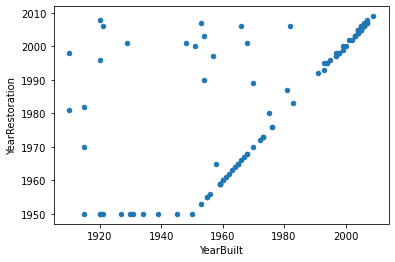

In [44]:
df.plot(x='YearBuilt',y='YearRestoration',kind='scatter')

<AxesSubplot:xlabel='CenterDistance', ylabel='Price'>

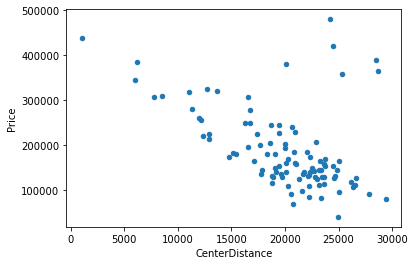

In [35]:
df.plot(x='CenterDistance',y='Price', kind='scatter')

In [38]:
df[(df['Price']>300000)&(df['CenterDistance']>20000)]

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
0,380000,8450,2003,2003,196,8,2996,20081
21,358000,7449,1930,1950,0,6,1116,25316
39,365000,6040,1955,1955,0,6,3521,28677
49,420000,7742,1966,1966,0,6,1479,24438
50,480000,13869,1997,1997,0,6,7757,24231
61,389000,7200,1920,1996,0,6,2171,28475


Сохраняю очищенный набор данных

In [17]:
df.to_excel('data_house_prices_2_clean.xlsx', index=False)

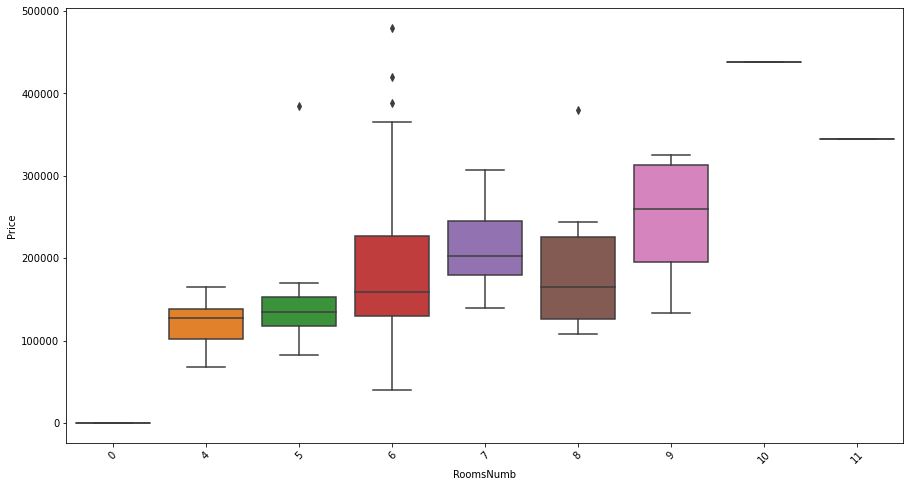

In [138]:
# RoomsNumb - по сути, категориальная переменная, которая может принимать только несколько конкретных значений
# Такой ящик с усми позволяет смотреть размах цены в зависимости количества комнат, а также наличие выбросов 
plt.figure(figsize=(15,8))
sns.boxplot(x='RoomsNumb', y='Price', data=df)
plt.xticks(rotation=45);

## Обработка пропущенных значений в pandas 

In [113]:
d = pd.DataFrame({'A':[1 ,2, None, 4, np.nan, 6, 7], 
                  'B':[11, 12, 13, None, None, None, 17],
                  'C':[21, 22, 23, None, None, 26, 27],
                  'D':[31, 32, 33, 34, 35, 36, 37]},
                  index=['a1','b2','c3','d4','e5','f6','j7'])
d

,A,B,C,D
a1,1.0,11.0,21.0,31
b2,2.0,12.0,22.0,32
c3,NaN,13.0,23.0,33
d4,4.0,NaN,NaN,34
e5,NaN,NaN,NaN,35
f6,6.0,NaN,26.0,36
j7,7.0,17.0,27.0,37


Удаление

In [114]:
# удаляет все строки, в которых есть хоть один None
d.dropna()

,A,B,C,D
a1,1.0,11.0,21.0,31
b2,2.0,12.0,22.0,32
j7,7.0,17.0,27.0,37


In [115]:
# удалить стоббцы, в которых есть хоть один None
d.dropna(axis=1)

,D
a1,31
b2,32
c3,33
d4,34
e5,35
f6,36
j7,37


In [116]:
# удалить строки, в которых все None
d.dropna(how='all')

,A,B,C,D
a1,1.0,11.0,21.0,31
b2,2.0,12.0,22.0,32
c3,NaN,13.0,23.0,33
d4,4.0,NaN,NaN,34
e5,NaN,NaN,NaN,35
f6,6.0,NaN,26.0,36
j7,7.0,17.0,27.0,37


In [117]:
# удалить строки по подмножеству столбцов
d.dropna(subset=['A','B'])

,A,B,C,D
a1,1.0,11.0,21.0,31
b2,2.0,12.0,22.0,32
j7,7.0,17.0,27.0,37


In [ ]:
d

In [118]:
# оставить только те строки, у которы есть хотябы  thresh непустых значений
d.dropna(thresh=2, axis=0)

,A,B,C,D
a1,1.0,11.0,21.0,31
b2,2.0,12.0,22.0,32
c3,NaN,13.0,23.0,33
d4,4.0,NaN,NaN,34
f6,6.0,NaN,26.0,36
j7,7.0,17.0,27.0,37


Заполнение

In [119]:
d

,A,B,C,D
a1,1.0,11.0,21.0,31
b2,2.0,12.0,22.0,32
c3,NaN,13.0,23.0,33
d4,4.0,NaN,NaN,34
e5,NaN,NaN,NaN,35
f6,6.0,NaN,26.0,36
j7,7.0,17.0,27.0,37


In [120]:
# заполнить одним значение
d.fillna(0)

,A,B,C,D
a1,1.0,11.0,21.0,31
b2,2.0,12.0,22.0,32
c3,0.0,13.0,23.0,33
d4,4.0,0.0,0.0,34
e5,0.0,0.0,0.0,35
f6,6.0,0.0,26.0,36
j7,7.0,17.0,27.0,37


In [121]:
# заполнить по словарю
values = {'A':0, 'B': '-', 'C': 'a'}
d.fillna(values)

,A,B,C,D
a1,1.0,11,21,31
b2,2.0,12,22,32
c3,0.0,13,23,33
d4,4.0,-,a,34
e5,0.0,-,a,35
f6,6.0,-,26,36
j7,7.0,17,27,37


In [122]:
# заполнить по словарю с лимитом
values = {'A':0, 'B': '-', 'C': 'a'}
d.fillna(values, limit=2)


,A,B,C,D
a1,1.0,11,21,31
b2,2.0,12,22,32
c3,0.0,13,23,33
d4,4.0,-,a,34
e5,0.0,-,a,35
f6,6.0,NaN,26,36
j7,7.0,17,27,37


In [123]:
d

,A,B,C,D
a1,1.0,11.0,21.0,31
b2,2.0,12.0,22.0,32
c3,NaN,13.0,23.0,33
d4,4.0,NaN,NaN,34
e5,NaN,NaN,NaN,35
f6,6.0,NaN,26.0,36
j7,7.0,17.0,27.0,37


In [154]:
# заполняем NaN предыдущим значением 
d.fillna(method='ffill', limit=1, axis=0) # pad

,A,B,C,D
a1,1.0,11.0,21.0,31
b2,2.0,12.0,22.0,32
c3,2.0,13.0,23.0,33
d4,4.0,13.0,23.0,34
e5,4.0,NaN,NaN,35
f6,6.0,NaN,26.0,36
j7,7.0,17.0,27.0,37


In [155]:
# заполняем NaN следующим значением 
d.fillna(method='bfill', limit=1, axis=0) # backfill

,A,B,C,D
a1,1.0,11.0,21.0,31
b2,2.0,12.0,22.0,32
c3,4.0,13.0,23.0,33
d4,4.0,NaN,NaN,34
e5,6.0,NaN,26.0,35
f6,6.0,17.0,26.0,36
j7,7.0,17.0,27.0,37
